In [ ]:
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
from matplotlib import pyplot as plt
from PIL import Image

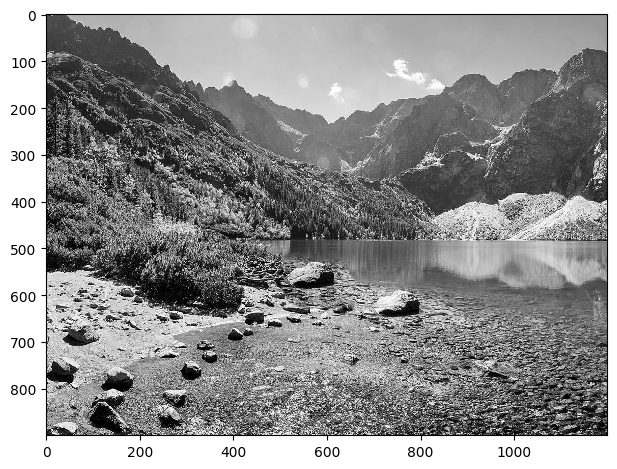

In [ ]:
image = io.imread("zad1.jpg")
image = rgb2gray(image)
#image = resize(image, output_shape=(500, 500))
io.imshow(image)

### **Reduction**

In [ ]:
#variable by how much to reduce
k_dim = 2
# matrix to reduce / nucleus of convulsions
k = k = np.ones([k_dim, k_dim]) / pow(k_dim,2)

In [ ]:
#image reduction function
def downsize_with_conv(im, k, step: int = 1):
    result = np.zeros([im.shape[0] // step, im.shape[1] // step])

    for x in range(0, image.shape[0], step):
        for y in range(0, image.shape[1], step):
            pix = (im[x : x + step, y : y + step] * k).sum()
            result[x // step, y // step] = pix

    return result

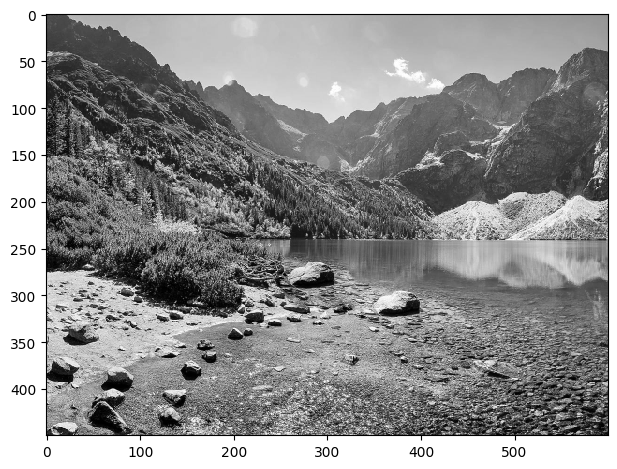

In [ ]:
downsize = downsize_with_conv(image,k,k_dim)
io.imshow(downsize)

### **Zooming in**

In [ ]:
def kernelH2(x,offset: float, width: float,a=0):
  x = x - offset
  return (x >= (-1 * width / 2)) * (x < width / 2)
def genInterpolation(realX,realY,multiplier,kernel,a=0):
  """
  @param
  w - with
  """
  if len(realX) != len(realY):
    print("Error: Quantity x is not equal to y")
    return 0
  j = -1
  yInt = []
  w = abs(realX[1]-realX[0])
  for i in range(len(realX)*multiplier):
    if i%multiplier==0:
       j+=1
    yInt.append((kernel(realX[j], 0, w, a) * realY[j] + realY[j]))
  return yInt

In [ ]:
#variable how much to enlarge
N = 2

In [ ]:
#definition of the zoom function
def zoomIn(im,scale):
  result = np.zeros([2 * len(im), len(im[0])])
  x = np.linspace(0, 1, len(im))
  for row in range(len(im[0])):
    result[:, row] = genInterpolation(x, im[:, row], scale, kernelH2)
  y = np.linspace(0,1, len(im[0]))
  final_result = np.zeros([2 * len(im), 2*len(im[0])])
  for col in range(result.shape[0]):
    final_result[col, :] = genInterpolation(y, result[col, :], scale, kernelH2)
  return final_result

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


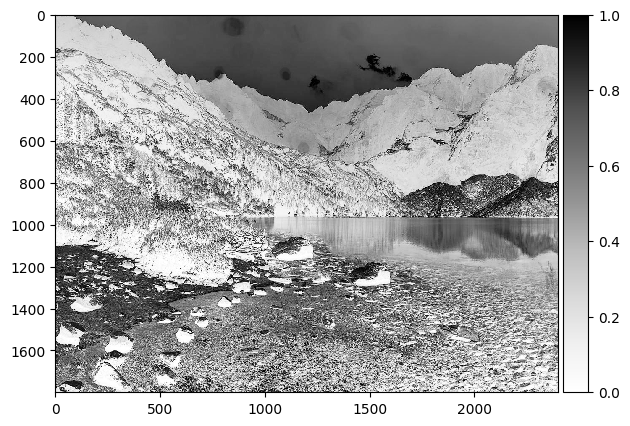

In [ ]:
#io.imshow(image)
io.imshow(zoomIn(image,N),cmap = "Greys", vmin=0, vmax=1)

### **Color scale**

800 800


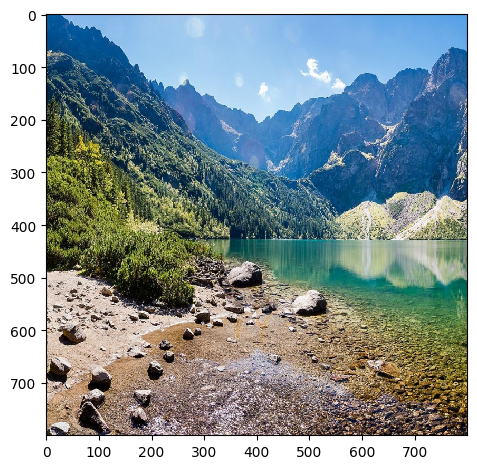

In [ ]:
img = io.imread("zad.jpg")
img = resize(img, output_shape=(800,800))
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]
io.imshow(img)
print("{0} {1}".format(len(img),len(img[0])))


In [ ]:
#variable by how much to reduce
k_dim = 2
# matrix to reduce / nucleus of convulsions
k = k = np.ones([k_dim, k_dim]) / pow(k_dim,2)
#image reduction function
def downsize_with_conv(im, k, step: int = 1):
    result = np.zeros([im.shape[0] // step, im.shape[1] // step])
    for x in range(0, im.shape[0], step):
        for y in range(0, im.shape[1], step):
            pix = (im[x : x + step, y : y + step] * k).sum()
            result[x // step, y // step] = pix

    return result

400 400


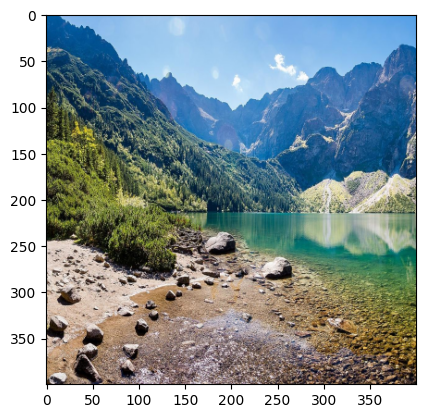

In [ ]:
red_mask = img[:,:,0]
green_mask = img[:,:,1]
blue_mask = img[:,:,2]
masks = [red_mask,green_mask,blue_mask]
downSizeMasks = []
for mask in masks:
  downSizeMasks.append(downsize_with_conv(mask, k=k, step=k_dim))
downsizeRGB = np.dstack(downSizeMasks)
plt.imshow(downsizeRGB)
plt.savefig("fotoDown.jpg", bbox_inches='tight', pad_inches=0)
print("{0} {1}".format(len(downsizeRGB),len(downsizeRGB[0])))

In [ ]:
N = 2
def zoomIn_rgb(im,scale):
  result = np.zeros([2 * len(im), len(im[0])])
  x = np.linspace(0, 1, len(im))
  for row in range(len(im)):
    result[:, row] = genInterpolation(x, im[:, row], scale, kernelH2)
  y = np.linspace(0,1, len(im[0]))
  final_result = np.zeros([2 * len(im), 2*len(im[0])])
  for col in range(result.shape[0]):
    final_result[col, :] = genInterpolation(y, result[col, :], scale, kernelH2)
  return final_result

1600 1600


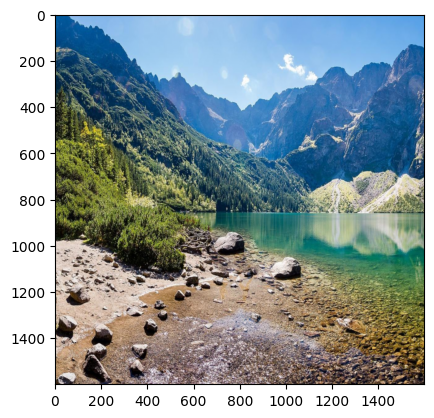

In [ ]:
upSizeMasks = []
for mask in masks:
  upSizeMasks.append(zoomIn_rgb(mask,N))
ZoomInRGB = np.dstack(upSizeMasks)
plt.imshow(ZoomInRGB)
plt.savefig("fotoUp.jpg", bbox_inches='tight', pad_inches=0)
print("{0} {1}".format(len(ZoomInRGB),len(ZoomInRGB[0])))